## Aula 05: Detecção de Anomalias #02

## Hoje

- Detecção de anomalias usando predição
- Detecção de anomalias usando agrupamento

### Detecção de anomalias usando predição

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (15, 8)

In [3]:
df = pd.read_csv("data/serie_de_mentirinha.csv")
data = np.array(df["data"])

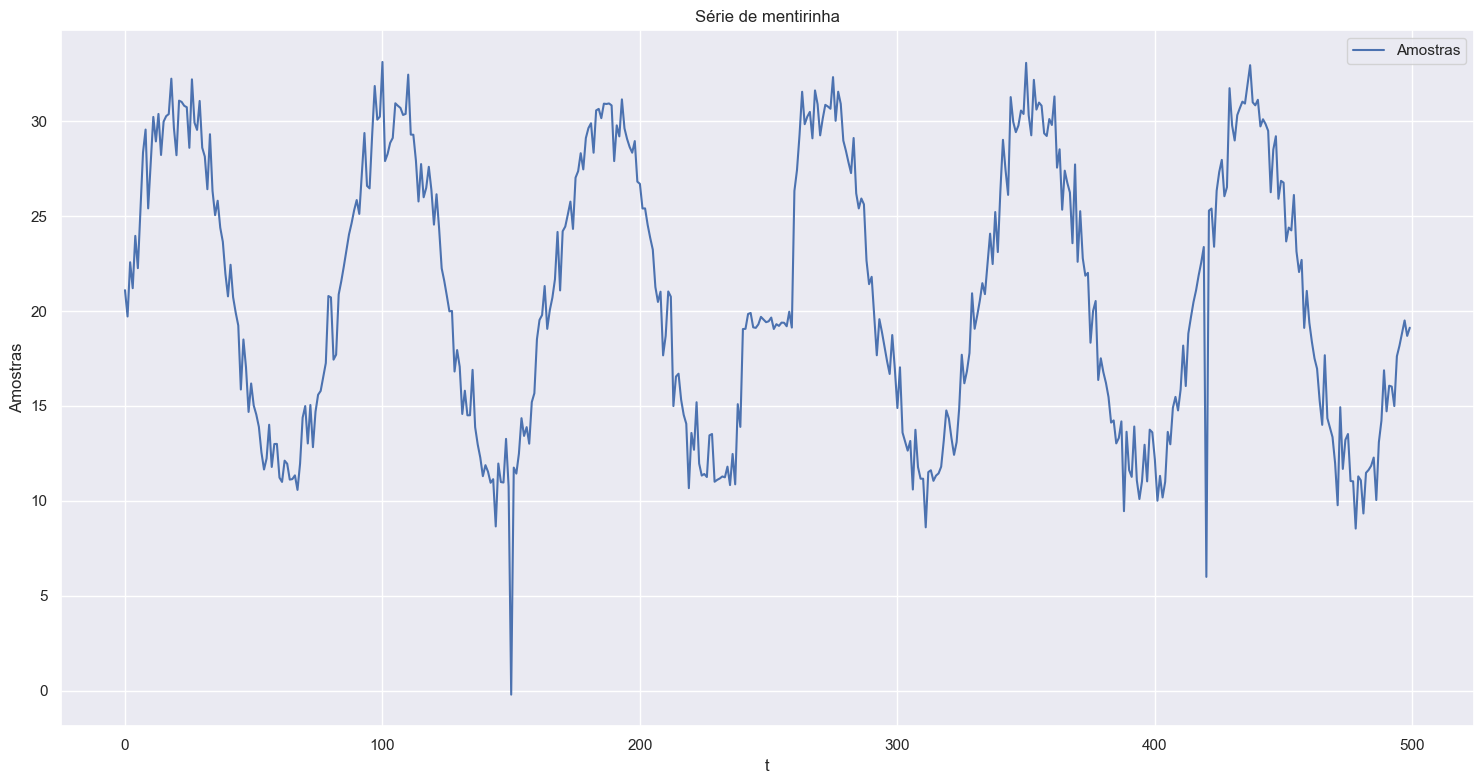

In [4]:
plt.plot(data, label="Amostras")
plt.title("Série de mentirinha")
plt.xlabel("t")
plt.ylabel("Amostras")
plt.legend()
plt.tight_layout()
plt.show()

## _Continuar..._